# Lab 8: Define and Solve an ML Problem of Your Choosing

In [35]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [36]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)  # YOUR CODE HERE

df.head()
df.shape

(32561, 15)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.

I chose the US census income data set to predict whether an individual's income is > 50,000 or < 50,000. This will be a supervised learning problem with label 'income binary' and it will be focused on binary classification since there are ony two possible classes for the label - either greater than 50k or less than. Some of the features are age, workclass, education, education-num, marital status, occupation, relationship, race, sex, capital gain and loss, native country etc. This is can create value for companies because it will be valuable for marketing/adversiting companies who can leverage this model to identofy high income individuals for targeted campaigns of premium/luxury goods. Financial institutions like banks can use income prediction as one of the factors to assess an applicant's creditworthiness. Moreover, governments/research proograms can find this helpful to understand how demographic factors influence income or to explore economic disparity in relation to social factors.  >

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.


Class distribution:
<=50K    0.75919
>50K     0.24081
Name: income_binary, dtype: float64


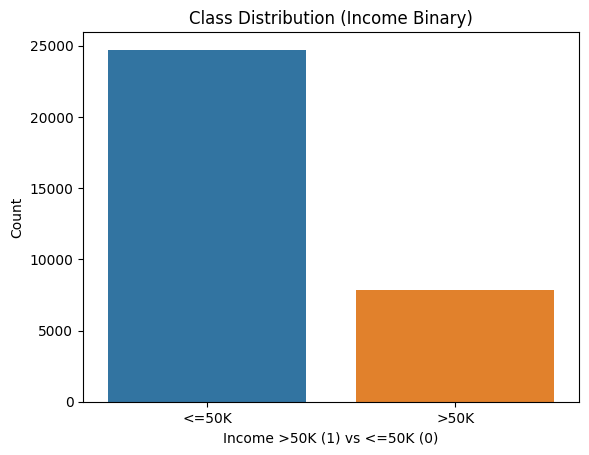

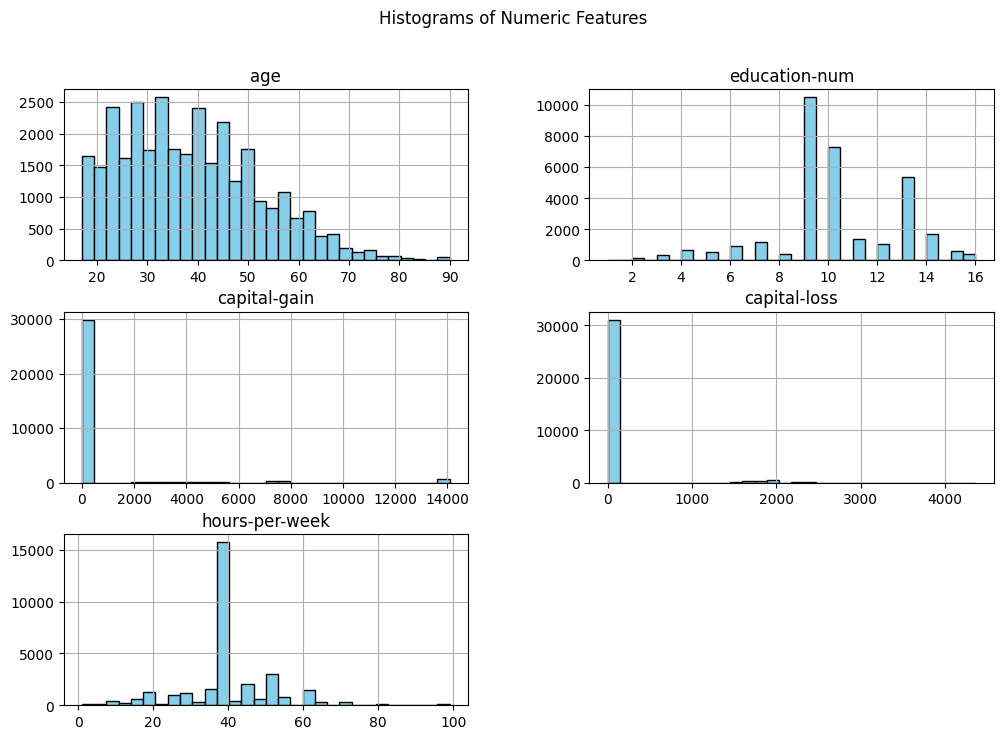

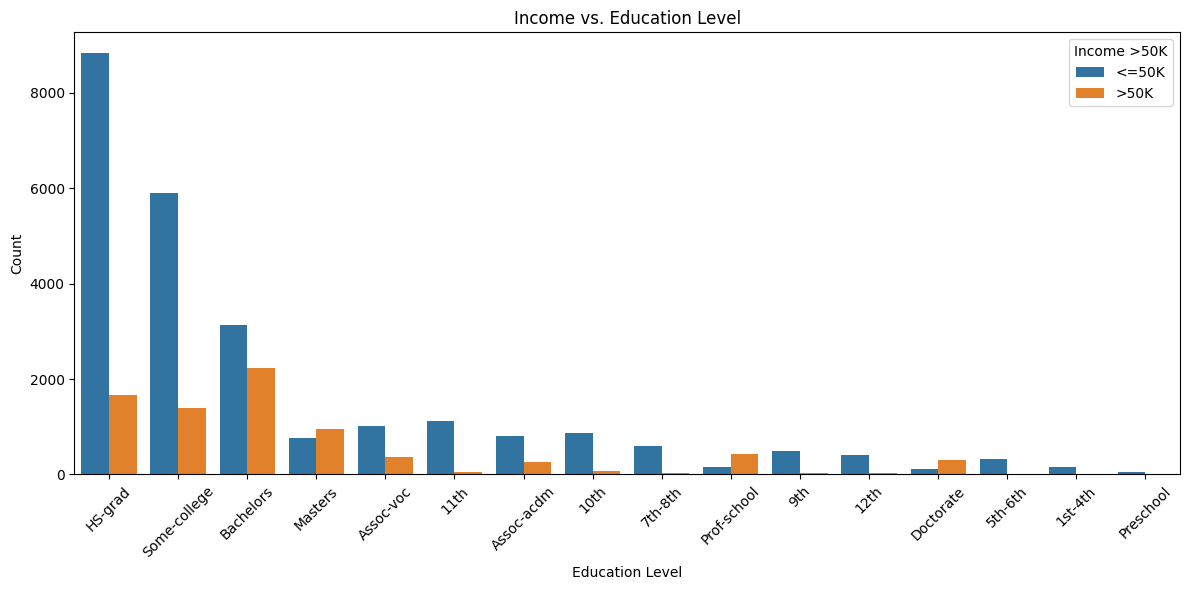

workclass: 8 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 14 unique values
relationship: 6 unique values
race: 5 unique values
sex_selfID: 2 unique values
native-country: 41 unique values
income_binary: 2 unique values


In [37]:
# YOUR CODE HERE

# View missingvalues + data types + stats
df.isnull().sum()
df.dtypes
df.describe()

# Class distribution
print("\nClass distribution:")
print(df['income_binary'].value_counts(normalize=True))

# See thee class imbalance
sns.countplot(x='income_binary', data=df)
plt.title('Class Distribution (Income Binary)')
plt.xlabel('Income >50K (1) vs <=50K (0)')
plt.ylabel('Count')
plt.show()

# Histogrums for numeric features
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[num_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

#Income vs Education (Categorical)
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income_binary', data=df, order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Income vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income >50K')
plt.tight_layout()
plt.show()

#Unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.

After analyzing my features, I chose to retain the most relevant numeric variables like `age`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week`. I excluded `fnlwgt` since it primarily represents sampling weights and is not particularly meaningful for income prediction. For categorical features, I applied one-hot encoding to variabls such as `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, and `native-country` to convert them into binary indicator variables for modeling.

To handle missing values, I used SimpleImputer with the most frequent strategy for categorical features and median strategy for numerical ones. Although the original dataset represents some missing values with `"?"`, I used an imputation pipeline which handled this implicitly through preprocessing.

Regarding outliers, I noticed that `capital-gain` and `capital-loss` were heavily skewed toward zero with extreme values so to reduce their influence, I applied winsorization by capping values at the 1st and 99th percentiles

For feature scaling, I applied StandardScaler to all numerical columns. This was important so asto ensure fair treatment of features with varying magnitudes and to improve model convergence, especially for algorithms like logistic regression that are sensitive to feature scales.

My target variable, `income`, was clearly imbalanced, with significantly more observations earning `<=50K`. Although I did not apply class weighting or re-sampling, I accounted for this imbalance in my evaluation metrics.

I built and trained two classification models -Logistic Regression and Random Forest. I split the data using an 80/20 train-test split and used GridSearchCV for hyperparameter tuning on the Random Forest model. I evaluated both models using accuracy, precision, recall, F1 score, ROC AUC**, and a confusion matrix. These metrics provided a comprehensive view of model performance beyond simple accuracy.

To interpret model results, I visualized feature importancesfrom the Random Forest, which helped highlight the most predictive variables. Based on the classification report, RF did outperform logistic regression, especially in identifying the minority class.Bascally, this project followed a full machine learning pipeline: data cleaning, preprocessing, modeling, evaluation, and interpretation. While I originally planned to include gradient boosting and more extensive model iteration, Random Forest achieved strong results, so additional complexity wasn’t necessary for this phase. The final model will be selected based on its performance on the held-out test set, ensuring it generalizes well to new, unseen data.>



The correlation with income_binary:
 income_binary_numeric    1.000000
capital-gain             0.347555
education-num            0.335154
age                      0.233638
hours-per-week           0.229523
capital-loss             0.150526
fnlwgt                  -0.009463
Name: income_binary_numeric, dtype: float64


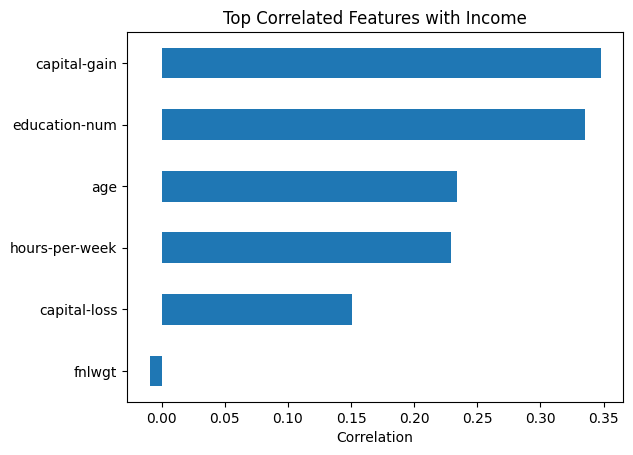

In [38]:
# YOUR CODE HERE 
#Convert income_binary to numeric values for correlation
df['income_binary_numeric'] = df['income_binary'].map({'>50K': 1, '<=50K': 0})

#Check correlation between numeric features and inxcome
correlation = df.corr()['income_binary_numeric'].sort_values(ascending=False)

#Show correlation values
print("The correlation with income_binary:\n", correlation)

#Plot top correlated features
correlation.drop('income_binary_numeric').head(10).plot(kind='barh')
plt.title('Top Correlated Features with Income')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.show()

#Remove the temporary numeric column
df.drop('income_binary_numeric', axis=1, inplace=True)



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [39]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#Dropping irelevant column
# Handle missing values
# For categorica,using most frequent value
# For numeric, using median
df.drop('fnlwgt', axis=1, inplace=True)
cat_cols = ['workclass', 'occupation', 'native-country']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
num_cols = ['age', 'hours-per-week']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Converting income_binary to numeric label
# One-hot encodeing categorical features
# Feature scaling
df['income_binary'] = df['income_binary'].map({'>50K': 1, '<=50K': 0})
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex_selfID', 'native-country']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
for col in ['capital-gain', 'capital-loss']:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
X = df.drop('income_binary', axis=1)
y = df['income_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)


In [40]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Metrics:")
print("accuracy:", accuracy_score(y_test, y_pred_log))
print("precision:", precision_score(y_test, y_pred_log))
print("recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))


Logistic Regression Metrics:
accuracy: 0.85014586212191
precision: 0.7338072669826224
recall: 0.5924744897959183
F1 Score: 0.6556104446012703
ROC AUC: 0.9037250959534472


In [41]:
rf_model = RandomForestClassifier(random_state=8)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Metrics:")
print("accuracy:", accuracy_score(y_test, y_pred_rf))
print("precision:", precision_score(y_test, y_pred_rf))
print("recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))



Random Forest Metrics:
accuracy: 0.8490710885920467
precision: 0.708779443254818
recall: 0.6332908163265306
F1 Score: 0.6689120916133379
ROC AUC: 0.8960681011535048


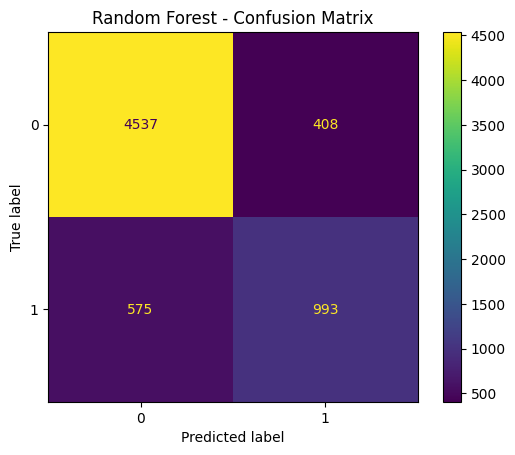

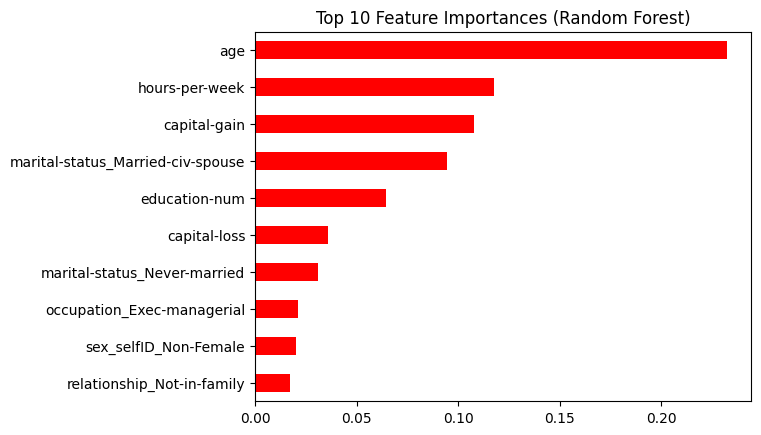

In [42]:

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='red')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [43]:

#Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

#Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=71), param_grid,
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

#Evaluate thhe best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("\nTuned Random Forest Metrics:")
print("accuracy:", accuracy_score(y_test, y_pred_best))
print("precision:", precision_score(y_test, y_pred_best))
print("recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Tuned Random Forest Metrics:
accuracy: 0.8545984953170582
precision: 0.7357630979498861
recall: 0.6179846938775511
F1 Score: 0.6717504332755633
ROC AUC: 0.9063484038711541


In [44]:
print("\n\n", classification_report(y_test, y_pred_best))




               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

